# Lab 3 - Speed of Light

Changing the distance and checking the difference in time.

In [1]:
import numpy as np

# DATA

fwhm1 = 2.04 # ns
fwhm2 = 1.68 # ns

d = np.linspace(1.2, 0.2, 11) # m
del_t1 = np.array([11.60, 11.04, 10.32, 9.68, 9.04, 8.32, 7.56, 6.92, 6.4, 5.72, 5.04]) # ns
del_t2 = np.array([11.72, 11.0, 10.24, 9.68, 8.92, 8.28, 7.64, 6.92, 6.28, 5.68, 5.08]) # ns
del_t3 = np.array([11.6, 10.96, 10.2, 9.68, 9.12, 8.36, 7.56, 6.96, 6.28, 5.68, 5.08]) # ns
del_t4 = np.array([11.6, 10.88, 10.24, 9.60, 9.04, 8.2, 7.56, 7.00, 6.32, 5.68, 5.0]) # ns
dels = np.array([np.average([x1,x2,x3,x4]) for x1,x2,x3,x4 in zip(del_t1, del_t2, del_t3, del_t4)]) # ns

t_w_25 = [5.72, 5.56, 5.68, 5.68] # ns
t_wo_25 = [5.44, 5.36, 5.40, 5.44] # ns
t_w_50 = [7.32, 7.32, 7.24, 7.28] # ns
t_wo_50 = [7.04, 7.08, 7.04, 7.08] # ns

power_range = [1.66, 1.847] # mW

time_spacing = 113.2 # micro sec
sigma_time_spaceing = 2 # micro sec

C = 2.99e8

In [2]:
fwhm = np.average([fwhm1, fwhm2])
fwhm_unc = np.std([fwhm1, fwhm2])
print(f"FWHM = {fwhm} ± {fwhm_unc}")

power = np.average(power_range)
power_unc = np.std(power_range)
print(f"Power = {power} ± {power_unc}")

FWHM = 1.8599999999999999 ± 0.18000000000000005
Power = 1.7534999999999998 ± 0.09350000000000003


In [3]:
from tabulate import tabulate

print(tabulate([dels]))

-----  -----  -----  ----  ----  ----  ----  ----  ----  ----  ----
11.63  10.97  10.25  9.66  9.03  8.29  7.58  6.95  6.32  5.69  5.05
-----  -----  -----  ----  ----  ----  ----  ----  ----  ----  ----


In [4]:
def sub(x, y):
    return y - x

diff_ts = [dels[0] - dels[i+1] for i in range(0, len(dels)-1)]
print(tabulate([diff_ts]))



----  ----  ----  ---  ----  ----  ----  ----  ----  ----
0.66  1.38  1.97  2.6  3.34  4.05  4.68  5.31  5.94  6.58
----  ----  ----  ---  ----  ----  ----  ----  ----  ----


In [11]:
speeds = [2*i*0.1/t * 1e9 for i,t in enumerate(diff_ts, 1)]
print(tabulate([speeds]))
ave_speeds = [np.average(r) for r in speeds]
c_exp = np.average(speeds)
print(f"Our calculated C is: {c_exp:.4e} m/s")
print(f"Compared to the accepted value that is a {(c_exp-C)/C:.3%} error.")

def calc_c_unc(d, d_unc, t, t_unc):
    a = np.sqrt((d_unc/d)**2 + (t_unc/t)**2)
    return 2*d*a/t

diff_t_scaleds = [str(t/i) for i,t in enumerate(diff_ts, start=1)]
diff_t_scaled = np.average([t/i for i,t in enumerate(diff_ts, start=1)]) / (1e9)
diff_t_scaled_unc = np.std([t/i for i,t in enumerate(diff_ts, start=1)]) / (1e9)
print(diff_t_scaled)
print(diff_t_scaled_unc)

u = calc_c_unc(0.02, 0.0005, diff_t_scaled, diff_t_scaled_unc)
print(f"The uncertainty in C is {u:.3e} m/s")

(C - c_exp) / u

print(tabulate([np.linspace(1.2, 0.2, 11), del_t1, del_t2, del_t3, del_t4, dels, diff_ts, diff_t_scaleds, speeds], showindex=
               ["Distances (m)", "Trial 1 (ns)","Trial 2 (ns)", "Trial 3 (ns)", "Trial 4 (ns)", "Average Time (ns)", 
                 "Differences (ns)",
                "Scaled Differences (ns)", "Speed of Light (m/s)"], floatfmt=".3", tablefmt='latex'))


----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------  ----------  -----------
3.0303e+08  2.89855e+08  3.04569e+08  3.07692e+08  2.99401e+08  2.96296e+08  2.99145e+08  3.01318e+08  3.0303e+08  3.03951e+08
----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------  ----------  -----------
Our calculated C is: 3.0083e+08 m/s
Compared to the accepted value that is a 0.612% error.
6.649988095238098e-10
1.0685326538355935e-11
The uncertainty in C is 1.788e+06 m/s
\begin{tabular}{lrrrrrrrrrrr}
\hline
 Distances (m)           &  1.2      &  1.1     &  1.0      & 0.9      & 0.8      & 0.7      & 0.6      & 0.5      & 0.4      & 0.3      & 0.2  \\
 Trial 1 (ns)            & 11.6      & 11.0     & 10.3      & 9.68     & 9.04     & 8.32     & 7.56     & 6.92     & 6.4      & 5.72     & 5.04 \\
 Trial 2 (ns)            & 11.7      & 11.0     & 10.2      & 9.68     & 8.92     & 8.28     & 7.64     & 6.92    

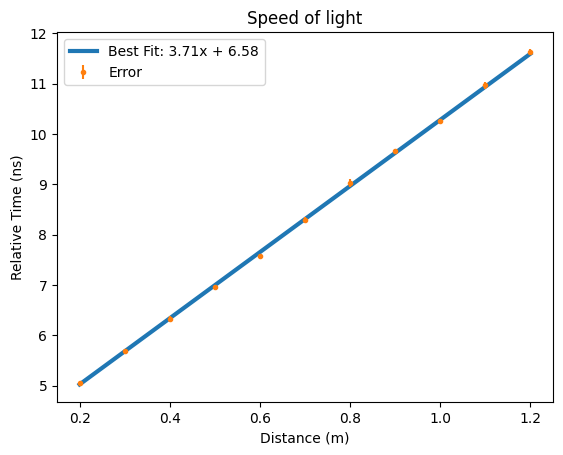

The value of b for the best fit line is 3.7.
The value of m for the best fit line is 6.6.
0.3041800404718898
The uncertainty of b for the best fit line is 0.025.
The uncertainty of m for the best fit line is 0.041.


In [18]:
from typing import Callable
import matplotlib.pyplot as plt

def mean(xs:list[float]) -> float:
    s = sum([x for x in xs]) # list comprehension will follow the pattern and the sum just adds
    N = len(xs) # length of xs
    return s/N

def std(xs:list[float]) -> float:
    xbar = mean(xs)
    s = sum([(x-xbar)**2 for x in xs])
    N = len(xs)
    return np.sqrt(s/(N-1)) # we use N-1 for the bias corrected version

# All of these functions are just python trnascripts of the functions above.

# this function is the DELTA in the formula
def delta(xs, ys, stds) -> float: 
    a = sum([1/sig**2 for sig in stds])
    b = sum([x**2/sig**2 for sig, x in zip(stds, xs)])
    c = sum([x/sig**2 for sig, x in zip(stds, xs)])
    return a*b - c**2

# this calculates the m hat in the formula
def m_fit(xs, ys, stds) -> float:
    a = sum([1/sig**2 for sig in stds])
    b = sum([x*y/sig**2 for x, y, sig in zip(xs,ys,stds)])
    c = sum([x/sig**2 for x, sig in zip(xs,stds)])
    d = sum([y/sig**2 for y, sig in zip(ys,stds)])
    return (a*b - c*d)/delta(xs, ys, stds)
    
# this calculates the b hat in the formula
def b_fit(xs, ys, stds) -> float:
    a = sum([x**2/sig**2 for x, sig in zip(xs, stds)])
    b = sum([y/sig**2 for y, sig in zip(ys,stds)])
    c = sum([x/sig**2 for x, sig in zip(xs,stds)])
    d = sum([x*y/sig**2 for x, y, sig in zip(xs,ys,stds)])
    return (a*b - c*d)/delta(xs, ys, stds)

# returns a function in the form f(x) = mx + b
def fit_line(xs, ys, stds) -> Callable:
    m = m_fit(xs,ys,stds)
    b = b_fit(xs,ys,stds)
    f = lambda x: m*x + b
    return f

# uncertainty in b
def sigma_m(xs, ys, stds) -> float:
    a = sum([1/sig**2 for sig in stds])
    return np.sqrt(a/delta(xs, ys, stds))

# uncertainty in m
def sigma_b(xs, ys, stds) -> float:    
    a = sum([x**2/sig**2 for x, sig in zip(xs, stds)])
    return np.sqrt(a/delta(xs, ys, stds))

x = d
y = dels
stds = np.array([std([x1,x2,x3,x4]) for x1,x2,x3,x4 in zip(del_t1, del_t2, del_t3, del_t4)])
args = (x, y, stds)
f = fit_line(*args)
m = b_fit(*args)
b = m_fit(*args)

plt.plot(x, f(x), linewidth=3)
plt.errorbar(x, y, stds, fmt=".")
plt.title("Speed of light")
plt.legend([f"Best Fit: {m:.2f}x + {b:.2f}", "Error"])
plt.xlabel("Distance (m)")
plt.ylabel("Relative Time (ns)")
plt.show()

print(f"The value of b for the best fit line is {b_fit(x, y, stds):.2}.")
print(f"The value of m for the best fit line is {m_fit(x, y, stds):.2}.")
m = m_fit(x, y, stds)
print(2/m)

print(f"The uncertainty of b for the best fit line is {sigma_b(x, y, stds):.2}.")
print(f"The uncertainty of m for the best fit line is {sigma_m(x, y, stds):.2}.")

In [22]:
def calc_n(t, l):
    return (C*t)/(1*l) + 1
def calc_n_unc(t, t_unc, l, l_unc):
    a = np.sqrt(t_unc**2 + (t*l_unc/l)**2)
    return C*a /(2*l)

t_w_25 = [5.72, 5.56, 5.68, 5.68] # ns
t_wo_25 = [5.44, 5.36, 5.40, 5.44] # ns
t_w_50 = [7.32, 7.32, 7.24, 7.28] # ns
t_wo_50 = [7.04, 7.08, 7.04, 7.08] # ns

del_t_25 = (np.average(t_w_25) - np.average(t_wo_25))/(1e9) # s
t_unc = (np.std([a-b for a,b in zip(t_w_25, t_wo_25)]))/(1e9) # s


n = calc_n(del_t_25, 15/100)
n_unc = calc_n_unc(del_t_25, t_unc, 0.15, 0.0005)
print(n)
print(n_unc)
print(f"{(n-1.489)/1.489:.3%}")

print([np.average(xs) for xs in [t_w_25, t_wo_25, t_w_50, t_wo_50]])

1.4983333333333317
0.033066126344338476
0.627%
[5.66, 5.410000000000001, 7.290000000000001, 7.0600000000000005]


In [13]:
duration = 1.86 / 1e9
separation = 113 / 1e6
power = 1.75 / 1000
wavelength = 1.064 / 1e6
h = 6.62607015e-34 
A = 4 / (1000)**2

E_pulse = power * separation
P_pulse = E_pulse / duration
E_photon = h * C / wavelength
photon_count = E_pulse/E_photon
fluence = power * separation / A
intensity = power * separation / (duration * A)

print(f"Energy_pulse = {E_pulse:.3} J/pulse")
print(f"Power_pulse = {P_pulse:.3} W/pulse")
print(f"Energy_photon = {E_photon:.3} J/photon")
print(f"N = {photon_count:.3} phton/pulse")
print(f"Fluence = {fluence:.3} J/m^2")
print(f"Intensity = {intensity:.3} W/m^2")


Energy_pulse = 1.98e-07 J/pulse
Power_pulse = 1.06e+02 W/pulse
Energy_photon = 1.86e-19 J/photon
N = 1.06e+12 phton/pulse
Fluence = 0.0494 J/m^2
Intensity = 2.66e+07 W/m^2
